In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Alzheimer_s Dataset_1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem143.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem2312.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem1965.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem2183.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem160.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem1498.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem1651.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem1652.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem2106.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem1941.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem211.jpg
/content/drive/MyDrive/Alzheimer_s Dataset_1/train/NonDemented/nonDem234.jpg
/content/drive/My

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow

from tensorflow.keras.applications.vgg19 import VGG19 # VGG19

import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')

Num GPUs Available:  1


In [ ]:
#define image dataset
#why do we rescale?
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)


train_dataset = image_generator.flow_from_directory(batch_size=16,
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset_1/train',
                                                 shuffle=True,
                                                 target_size=(224,224),
                                                 subset="training",
                                                 class_mode='categorical')
image_generator = ImageDataGenerator(rescale=1/255,validation_split=0.2)
validation_dataset = image_generator.flow_from_directory(batch_size=16,
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset_1/test',
                                                 shuffle=True,
                                                 target_size=(224,224),
                                                 class_mode='categorical')


submission = image_generator.flow_from_directory(
                                                 directory='/content/drive/MyDrive/Alzheimer_s Dataset_1/test',
                                                 shuffle=False,
                                                subset="validation",
                                                 target_size=(224,224),
                                                 class_mode=None)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 254 images belonging to 4 classes.


In [ ]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc'),'acc'])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [ ]:
history = modelvgg.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
321/321 [==============================] - 2053s 6s/step - loss: 0.9953 - auc: 0.8518 - acc: 0.5985 - val_loss: 0.9837 - val_auc: 0.8466 - val_acc: 0.5582
Epoch 2/30
321/321 [==============================] - 31s 97ms/step - loss: 0.6164 - auc: 0.9323 - acc: 0.7420 - val_loss: 0.9077 - val_auc: 0.8833 - val_acc: 0.6419
Epoch 3/30
321/321 [==============================] - 32s 99ms/step - loss: 0.4553 - auc: 0.9625 - acc: 0.8061 - val_loss: 0.7851 - val_auc: 0.8987 - val_acc: 0.6646
Epoch 4/30
321/321 [==============================] - 32s 98ms/step - loss: 0.4258 - auc: 0.9667 - acc: 0.8268 - val_loss: 0.7010 - val_auc: 0.9143 - val_acc: 0.6873
Epoch 5/30
321/321 [==============================] - 38s 117ms/step - loss: 0.3402 - auc: 0.9789 - acc: 0.8692 - val_loss: 1.7416 - val_auc: 0.8128 - val_acc: 0.4832
Epoch 6/30
321/321 [==============================] - 32s 99ms/step - loss: 0.2577 - auc: 0.9890 - acc: 0.9080 - val_loss: 0.7252 - val_auc: 0.9134 - val_acc: 0.6912
Epo

In [ ]:
modelvgg.save("VGG19_2.h5")

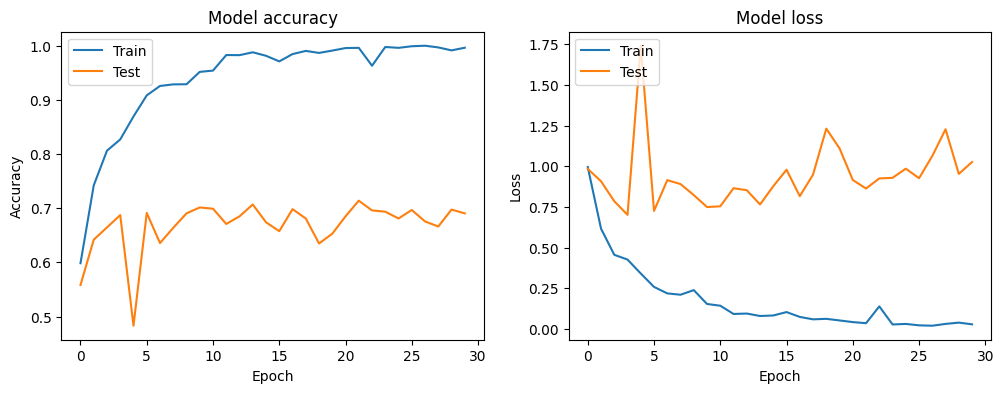

In [ ]:
import matplotlib.pyplot as plt


def plot_training_history(history):

    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()


plot_training_history(history)

In [ ]:
from tensorflow.keras.models import Sequential, Model, load_model
vg_model = load_model("/content/VGG19_2.h5")

In [ ]:
loss, auc,accuracy = vg_model.evaluate(validation_dataset)
print("Loss: ", loss)
print("AUC: ", auc)
print("Accuracy: ", accuracy)

80/80 [==============================] - 6s 75ms/step - loss: 1.0262 - auc: 0.9018 - acc: 0.6904
Loss:  1.026240587234497
AUC:  0.901833713054657
Accuracy:  0.6903831362724304


In [ ]:
results = vg_model.evaluate(train_dataset)

# Print all returned metrics
print("Loss: ", results[0])
print("AUC: ", results[1])
print("Accuracy: ", results[2])

321/321 [==============================] - 25s 78ms/step - loss: 0.0118 - auc: 1.0000 - acc: 1.0000
Loss:  0.011761990375816822
AUC:  1.0
Accuracy:  1.0


80/80 [==============================] - 7s 88ms/step


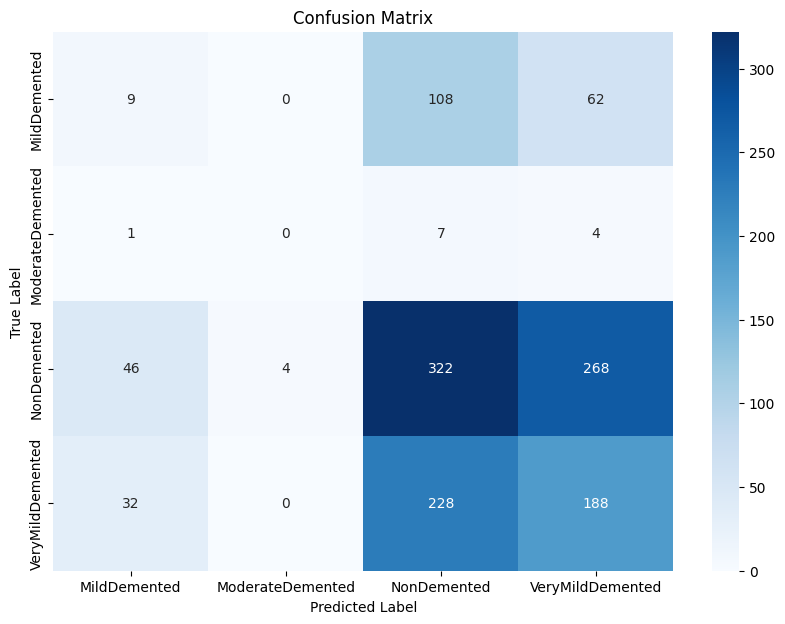

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = vg_model.predict(validation_dataset, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = validation_dataset.classes
class_names = list(validation_dataset.class_indices.keys())

cm = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()